M`ij = Mij + |∇Mij|
重点就是|∇Mij|的算法
梯度|∇Mij| 可以从|Gx^2+Gy^2|^(0.5) 简化为 |Gx| + |Gy|

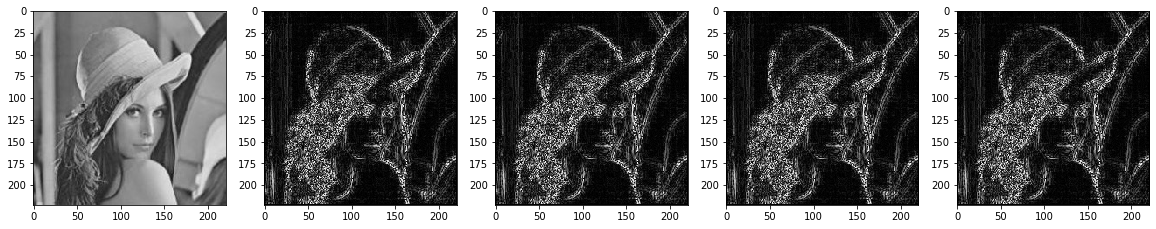

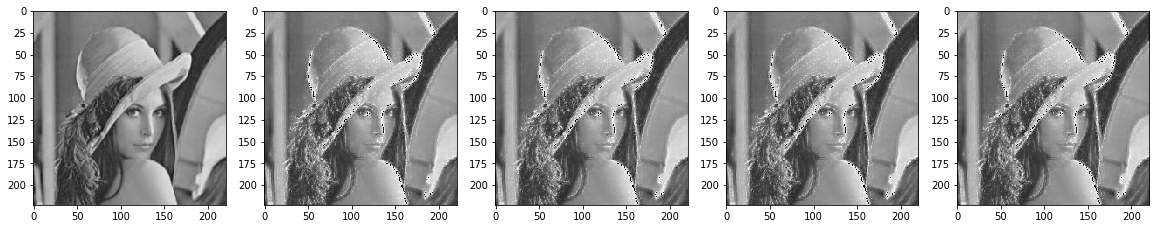

In [9]:
import numpy as np
#裁出一个clxcl大小的区域
def CutCore(img,chi,cwi,cl = 3):
    #这里的减一是偶数时取左上角,如2x2时,l=0
    l = int((cl-1)/2)
    return img[chi-l:chi+l+1,cwi-l:cwi+l+1]

# #手动实现一下卷积的过程
# def convolution(img,chi,cwi,core):
#     cl = len(core)
#     hcl= int((cl-1)/2)
#     res = 0
#     for hi in range(cl):
#         for wi in range(cl):
#             res += img[chi - hcl + hi, cwi - hcl + wi] * core[hi,wi]
#     return res

class __sharpen_core__:
    def __init__(self,x:list,y:list):
        self.x = np.array(x)
        self.y = np.array(y)

sharpen_core = {
    "robert":__sharpen_core__(
        [
            [-1,0],
            [ 0,1],
        ],
        [
            [0,-1],
            [1, 0],
        ]
    ),
    "prewitt":__sharpen_core__(
        [
            [-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1],
        ],
        [
            [-1,-1,-1],
            [ 0, 0, 0],
            [ 1, 1, 1],
        ]
    ),
    "sobel":__sharpen_core__(
        [
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1],
        ],
        [
            [-1,-2,-1],
            [ 0, 0, 0],
            [ 1, 2, 1],
        ]
    ),
    "laplace":__sharpen_core__(
        [
            [ 0,-1, 0],
            [-1, 4,-1],
            [ 0,-1, 0],
        ],
        [
            [-1,-1,-1],
            [-1, 8,-1],
            [-1,-1,-1],
        ]
    ),
}

def extract_edge_one_channel(img,op = "robert"):
    if type(op) == type(""):
        opc = sharpen_core[op]
    else:
        opc = op
    res = np.zeros_like(img)
    opcl = len(opc.x)
    halfopcl = int(opcl/2)
    h,w = img.shape

    for hi in range(halfopcl,h-halfopcl):
        for wi in range(halfopcl,w-halfopcl):
            cc = CutCore(img,hi,wi,opcl)
            x = np.sum(opc.x * cc)
            y = np.sum(opc.y * cc)
            nabla = np.abs(x)+np.abs(y)
            # x = convolution(img,hi,wi,opc.x)
            # y = convolution(img,hi,wi,opc.y)
            res[hi,wi] = nabla
            
    return res

def extract_edge(img,op = "robert"):
    res = np.zeros_like(img)
    for i in range(3):
        res[:,:,i] = extract_edge_one_channel(img[:,:,i],op)
    return res

#op指定算子,支持自定义算子,但是需要有x,y属性,degree：锐化程度
def sharpen_one_channel(img,op = "robert",degree = 0.2):
    return img +  extract_edge_one_channel(img,op) * degree

def sharpen(img,op = "robert",degree=0.3):
    for i in range(3):
        img[:,:,i] = img[:,:,i] + extract_edge_one_channel(img[:,:,i],op) * degree
    return img

import utils
extfucs = [lambda img:img]
for key in sharpen_core.keys():
    extfucs.append(
        lambda img:extract_edge(img,key)
    )
shpfucs = [lambda img:img]
for key in sharpen_core.keys():
    shpfucs.append(
        lambda img:sharpen(img,key)
    )

sample = utils.read("../imgs/c2/sharpen.jpg")
utils.compare(sample,extfucs)
utils.compare(sample,shpfucs)


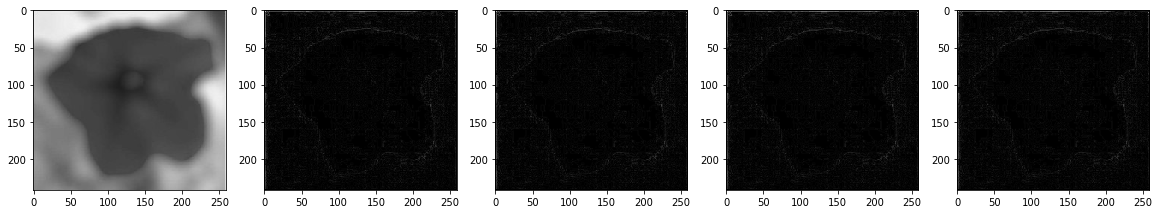

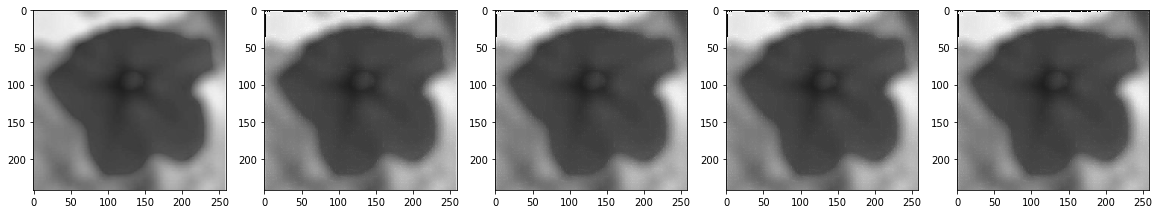

In [10]:
sample = utils.read("../imgs/c2/filter1.jpg")
utils.compare(sample,extfucs)
utils.compare(sample,shpfucs)